In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd

ox.__version__

'2.0.1'

In [11]:


place5_around = ["Baltimore, Maryland, USA"]
# 自定义过滤器：查询高速公路和主要道路
cf7 = '["highway"~"pedestrian|footway|path|tertiary|secondary|primary|motorway"]'
G = ox.graph.graph_from_place(place5_around, network_type="drive", custom_filter=cf7)

In [ ]:
# 获取边的颜色列表
edge_colors = []
edge_liwh = []
for u, v, data in G.edges(data=True):
    if data["highway"] == "footway" or data["highway"] == "pedestrian":
        edge_colors.append("#4C5445")  # 高速公路用红色
        edge_liwh.append(1)
    elif data["highway"] == "secondary" or data["highway"] == "primary" or data["highway"] == "tertiary":
        edge_liwh.append(1)
        edge_colors.append("#908982")  # 主要道路用蓝色
    elif data["highway"] == "motorway":
        edge_liwh.append(1)
        edge_colors.append("red")#D4C3AA
    else:
        edge_liwh.append(0)
        edge_colors.append("#A08887")  # 其他道路用灰色

# 绘制图形
fig, ax = ox.plot.plot_graph(
    G,
    node_size=0,  # 不显示节点
    edge_color=edge_colors,  # 使用自定义颜色
    edge_linewidth=edge_liwh,  # 设置边线宽度
    bgcolor="w",  # 背景颜色为白色
    show=False,  # 不立即显示
    close=False,  # 不关闭图形
)

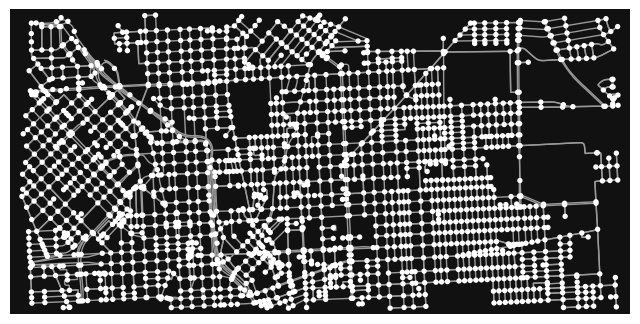

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
import osmnx as ox

# 定义长方形范围的经纬度坐标
#north, south, east, west = , , 
cf = '["highway"~"motorway|primary|secondary|tertiary|residential|service"]'
#G57 = ox.graph.graph_from_place(place5_around, network_type="drive", custom_filter=cf7)
# 获取网络图
G = ox.graph.graph_from_bbox([-76.635151, 39.289427, -76.560474, 39.317796], network_type='drive')

# 可视化网络图
ox.plot_graph(G)

In [15]:
import networkx as nx
from networkx.algorithms import community

# 如果G是有向图，先转换为无向图
G_undirected = nx.to_undirected(G)

# 使用Louvain算法进行社区检测
communities = community.greedy_modularity_communities(G_undirected)

# 计算模块度Q
modularity = community.modularity(G_undirected, communities)

print(f"Modularity Q: {modularity}")

Modularity Q: 0.8693193934172755
